In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon, LineString

In [12]:
df = pd.read_csv("data\서울특별시 광진구_착한가격업소_20250224.csv", encoding="cp949")
print(df.shape)
df

(72, 7)


,업소명,도로명주소,지번주소,전화번호,위도,경도,데이터기준일자
0,흥부농장,서울특별시 광진구 뚝섬로59길 81-2,서울특별시 광진구 자양동 624-25,02-3437-3611,37.535523,127.082799,2025-02-24
1,금강숯불생고기,서울특별시 광진구 용마산로7길 9,서울특별시 광진구 중곡동 124-3,02-3437-9599,37.558986,127.087090,2025-02-24
2,겨울나그네,서울특별시 광진구 능동로 147-1,서울특별시 광진구 화양동 2-47,02-498-3650,37.544035,127.072222,2025-02-24
3,홍천화로숯불갈비,서울특별시 광진구 천호대로110길 27,서울특별시 광진구 능동 223-45,02-454-9285,37.555962,127.079755,2025-02-24
4,이삭 홍두깨 칼국수,서울특별시 광진구 동일로72길 51,서울특별시 광진구 중곡동 192-30,02-464-8457,37.565345,127.080468,2025-02-24
...,...,...,...,...,...,...,...
67,동현세탁,서울특별시 광진구 뚝섬로52라길 65,서울특별시 광진구 자양동 650-34,02-458-6268,37.529385,127.082159,2025-02-24
68,한양세탁소,서울특별시 광진구 뚝섬로46길 34,서울특별시 광진구 자양동 599-3,02-452-3769,37.531249,127.076458,2025-02-24
69,중원사,서울특별시 광진구 천호대로135길 8,서울특별시 광진구 구의동 57-22,NaN,37.549868,127.092265,2025-02-24
70,리오스포토스튜디오,서울특별시 광진구 능동로40길 3,서울특별시 광진구 중곡동 161-43,02-455-6727,37.558309,127.080480,2025-02-24


In [7]:
df = df[["업소명", "위도", "경도"]]
df

,업소명,위도,경도
0,흥부농장,37.535523,127.082799
1,금강숯불생고기,37.558986,127.087090
2,겨울나그네,37.544035,127.072222
3,홍천화로숯불갈비,37.555962,127.079755
4,이삭 홍두깨 칼국수,37.565345,127.080468
...,...,...,...
67,동현세탁,37.529385,127.082159
68,한양세탁소,37.531249,127.076458
69,중원사,37.549868,127.092265
70,리오스포토스튜디오,37.558309,127.080480


In [13]:
df["위도"] = df["위도"].astype(float)
df["경도"] = df["경도"].astype(float)
df["geometry"] = df.apply(lambda row : Point(row["경도"], row["위도"]), axis=1)
df = gpd.GeoDataFrame(df, geometry="geometry")
df.crs = {"init": "epsg:4326"}
df = df.to_crs({"init": "epsg:4326"})
df

c:\Users\heron\anaconda3\envs\gj_env\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,업소명,도로명주소,지번주소,전화번호,위도,경도,데이터기준일자,geometry
0,흥부농장,서울특별시 광진구 뚝섬로59길 81-2,서울특별시 광진구 자양동 624-25,02-3437-3611,37.535523,127.082799,2025-02-24,POINT (127.0828 37.53552)
1,금강숯불생고기,서울특별시 광진구 용마산로7길 9,서울특별시 광진구 중곡동 124-3,02-3437-9599,37.558986,127.087090,2025-02-24,POINT (127.08709 37.55899)
2,겨울나그네,서울특별시 광진구 능동로 147-1,서울특별시 광진구 화양동 2-47,02-498-3650,37.544035,127.072222,2025-02-24,POINT (127.07222 37.54404)
3,홍천화로숯불갈비,서울특별시 광진구 천호대로110길 27,서울특별시 광진구 능동 223-45,02-454-9285,37.555962,127.079755,2025-02-24,POINT (127.07975 37.55596)
4,이삭 홍두깨 칼국수,서울특별시 광진구 동일로72길 51,서울특별시 광진구 중곡동 192-30,02-464-8457,37.565345,127.080468,2025-02-24,POINT (127.08047 37.56535)
...,...,...,...,...,...,...,...,...
67,동현세탁,서울특별시 광진구 뚝섬로52라길 65,서울특별시 광진구 자양동 650-34,02-458-6268,37.529385,127.082159,2025-02-24,POINT (127.08216 37.52939)
68,한양세탁소,서울특별시 광진구 뚝섬로46길 34,서울특별시 광진구 자양동 599-3,02-452-3769,37.531249,127.076458,2025-02-24,POINT (127.07646 37.53125)
69,중원사,서울특별시 광진구 천호대로135길 8,서울특별시 광진구 구의동 57-22,NaN,37.549868,127.092265,2025-02-24,POINT (127.09227 37.54987)
70,리오스포토스튜디오,서울특별시 광진구 능동로40길 3,서울특별시 광진구 중곡동 161-43,02-455-6727,37.558309,127.080480,2025-02-24,POINT (127.08048 37.55831)


In [8]:
shp_path = "data/shp/100m격자.shp"
gdf = gpd.read_file(shp_path)
gdf.rename(columns={"gid": "GID"}, inplace=True)
gdf

,GID,geometry
0,다사628508,"POLYGON ((962800 1950800, 962800 1950900, 9629..."
1,다사636494,"POLYGON ((963600 1949400, 963600 1949500, 9637..."
2,다사622510,"POLYGON ((962200 1951000, 962200 1951100, 9623..."
3,다사622494,"POLYGON ((962200 1949400, 962200 1949500, 9623..."
4,다사630485,"POLYGON ((963000 1948500, 963000 1948600, 9631..."
...,...,...
1807,다사636487,"POLYGON ((963600 1948700, 963600 1948800, 9637..."
1808,다사644526,"POLYGON ((964400 1952600, 964400 1952700, 9645..."
1809,다사624501,"POLYGON ((962400 1950100, 962400 1950200, 9625..."
1810,다사613479,"POLYGON ((961300 1947900, 961300 1948000, 9614..."


In [28]:
gdf = gdf.to_crs("EPSG:4326")
gdf

,GID,geometry
0,다사628508,"POLYGON ((127.07883 37.5558, 127.07882 37.5567..."
1,다사636494,"POLYGON ((127.08795 37.54321, 127.08795 37.544..."
2,다사622510,"POLYGON ((127.07202 37.55758, 127.07202 37.558..."
3,다사622494,"POLYGON ((127.0721 37.54315, 127.0721 37.54406..."
4,다사630485,"POLYGON ((127.08121 37.53507, 127.0812 37.5359..."
...,...,...
1807,다사636487,"POLYGON ((127.08799 37.5369, 127.08798 37.5378..."
1808,다사644526,"POLYGON ((127.09685 37.57208, 127.09685 37.572..."
1809,다사624501,"POLYGON ((127.07433 37.54947, 127.07433 37.550..."
1810,다사613479,"POLYGON ((127.062 37.5296, 127.06199 37.5305, ..."


In [15]:
shp_path3 = r"data\shp\N3A_G0110000.shp"
gdf3 = gpd.read_file(shp_path3)
gdf3

,UFID,BJCD,NAME,DIVI,SCLS,FMTA,geometry
0,100037705074G01110100000000000215,1121510100,중곡동,HJD010,G0018117,R23120215,"POLYGON ((964868.173 1951169.287, 964863.357 1..."
1,100037705074G01110100000000000216,1121510200,능동,HJD010,G0018117,R23120216,"POLYGON ((963739.001 1950413.676, 963718.401 1..."
2,100037705084G01110100000000000217,1121510300,구의동,HJD010,G0018117,R23120217,"POLYGON ((965106.925 1950858.311, 965092.671 1..."
3,100037705085G01110100000000000218,1121510400,광장동,HJD010,G0018117,R23120218,"POLYGON ((964839.847 1948644.596, 964703.355 1..."
4,100037705083G01110100000000000219,1121510500,자양동,HJD010,G0018117,R23120219,"POLYGON ((963107.89 1949210.737, 963108.983 19..."
5,100037705083G01110100000000000220,1121510700,화양동,HJD010,G0018117,R23120220,"POLYGON ((962412.351 1949832.458, 962415.476 1..."
6,100037705073G01110100000000000221,1121510900,군자동,HJD010,G0018117,R23120221,"POLYGON ((962858.897 1950952.364, 962856.23 19..."


In [27]:
gdf3 = gdf3.to_crs("EPSG:4326")
gdf3

,UFID,BJCD,NAME,DIVI,SCLS,FMTA,geometry
0,100037705074G01110100000000000215,1121510100,중곡동,HJD010,G0018117,R23120215,"POLYGON ((127.10222 37.55921, 127.10217 37.559..."
1,100037705074G01110100000000000216,1121510200,능동,HJD010,G0018117,R23120216,"POLYGON ((127.08948 37.55235, 127.08924 37.552..."
2,100037705084G01110100000000000217,1121510300,구의동,HJD010,G0018117,R23120217,"POLYGON ((127.10494 37.55641, 127.10478 37.555..."
3,100037705085G01110100000000000218,1121510400,광장동,HJD010,G0018117,R23120218,"POLYGON ((127.10202 37.53645, 127.10047 37.537..."
4,100037705083G01110100000000000219,1121510500,자양동,HJD010,G0018117,R23120219,"POLYGON ((127.08239 37.54149, 127.0824 37.5415..."
5,100037705083G01110100000000000220,1121510700,화양동,HJD010,G0018117,R23120220,"POLYGON ((127.07449 37.54706, 127.07452 37.547..."
6,100037705073G01110100000000000221,1121510900,군자동,HJD010,G0018117,R23120221,"POLYGON ((127.07948 37.55717, 127.07945 37.557..."


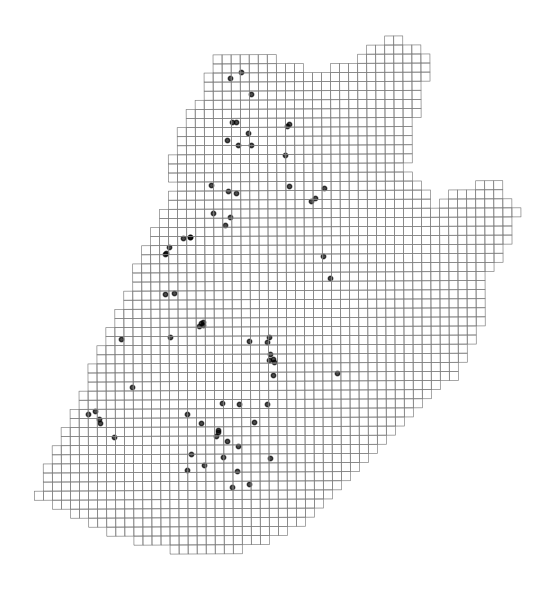

In [29]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis("off")
gdf.boundary.plot(ax=ax, color="grey", linewidth=0.5)

df.plot(ax=ax, color="black", markersize=10, alpha=0.7)

# 동 경계
# gdf3.boundary.plot(ax=ax, color="black", linewidth=0.5)

plt.tight_layout()
# plt.savefig("test.png", dpi=300, transparent=True)
plt.show()